In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import linalg

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [4]:
# K-means on example dataset
data1 = loadmat('data/ex7data2.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [5]:
X1 = data1['X']
print('X1:', X1.shape)

X1: (300, 2)


In [6]:
km1 = KMeans(3)
km1.fit(X1)

KMeans(n_clusters=3)

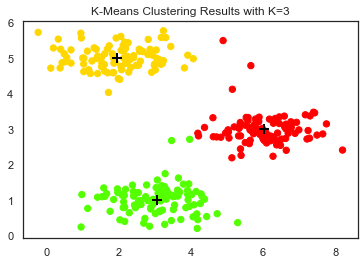

In [8]:
plt.scatter(X1[:,0], X1[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
plt.title('K-Means Clustering Results with K=3')
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

In [9]:
# Image compression with K-means
img = plt.imread('data/bird_small.png')
img_shape = img.shape
img_shape

(128, 128, 3)

In [10]:
A = img/255

In [11]:
AA = A.reshape(128*128,3)
AA.shape

(16384, 3)

In [12]:
km2 = KMeans(16)
km2.fit(AA)

KMeans(n_clusters=16)

In [13]:
B = km2.cluster_centers_[km2.labels_].reshape(img_shape[0], img_shape[1], 3)

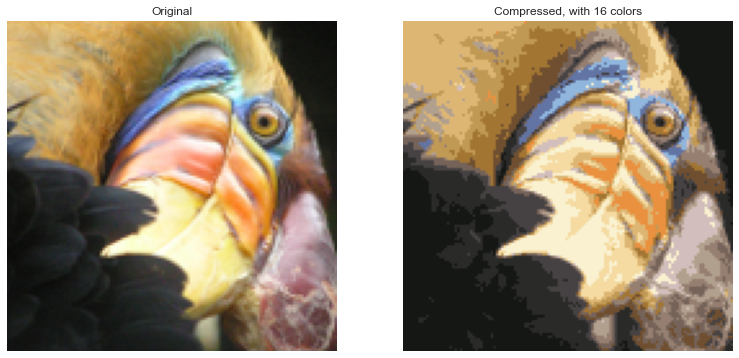

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,9))
ax1.imshow(img)
ax1.set_title('Original')
ax2.imshow(B*255)
ax2.set_title('Compressed, with 16 colors')

for ax in fig.axes:
    ax.axis('off')

In [22]:
# PCA on example data set - Using scipy instead of scikit-learn
data2 = loadmat('data/ex7data1.mat')
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [23]:
X2 = data2['X']
print('X2:', X2.shape)

X2: (50, 2)


In [24]:
# Standardizing the data.
scaler = StandardScaler()
scaler.fit(X2)

StandardScaler()

In [25]:
U, S, V = linalg.svd(scaler.transform(X2).T)
print(U)
print(S)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[9.3153915  3.63641048]


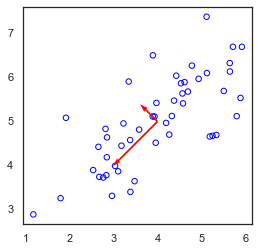

In [26]:
plt.scatter(X2[:,0], X2[:,1], s=30, edgecolors='b',facecolors='None', linewidth=1);
# setting aspect ratio to 'equal' in order to show orthogonality of principal components in the plot
plt.gca().set_aspect('equal')
plt.quiver(scaler.mean_[0], scaler.mean_[1], U[0,0], U[0,1], scale=S[1], color='r')
plt.quiver(scaler.mean_[0], scaler.mean_[1], U[1,0], U[1,1], scale=S[0], color='r');